In [1]:
# MS07: Organ Primordia Crystallization at Stellar Resonance Nodes
# Dr. Mordin Solus - Morphogenic Research Log
# "Organs don't form randomly. They crystallize where field harmonics create stable nodes."

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import torch
import torch.nn.functional as F
from datetime import datetime
import json
from scipy.ndimage import gaussian_filter
from scipy.spatial import Voronoi, voronoi_plot_2d
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# GPU setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computing on: {device}")
print(f"Timestamp: {datetime.now().isoformat()}")

# Initialize embryonic field
field_size = (256, 256, 128)  # High resolution for organ details
embryo_field = torch.zeros(field_size, dtype=torch.complex64, device=device)

print("\n=== ORGAN PRIMORDIA: CRYSTALLIZATION AT RESONANCE NODES ===")
print("Hypothesis: Organs form where multiple stellar standing waves intersect")
print("Creating Chladni patterns in 3D morphogenic field...")

Computing on: cuda
Timestamp: 2025-06-11T20:27:11.849926

=== ORGAN PRIMORDIA: CRYSTALLIZATION AT RESONANCE NODES ===
Hypothesis: Organs form where multiple stellar standing waves intersect
Creating Chladni patterns in 3D morphogenic field...



=== CHLADNI PATTERNS IN EMBRYONIC FIELD ===


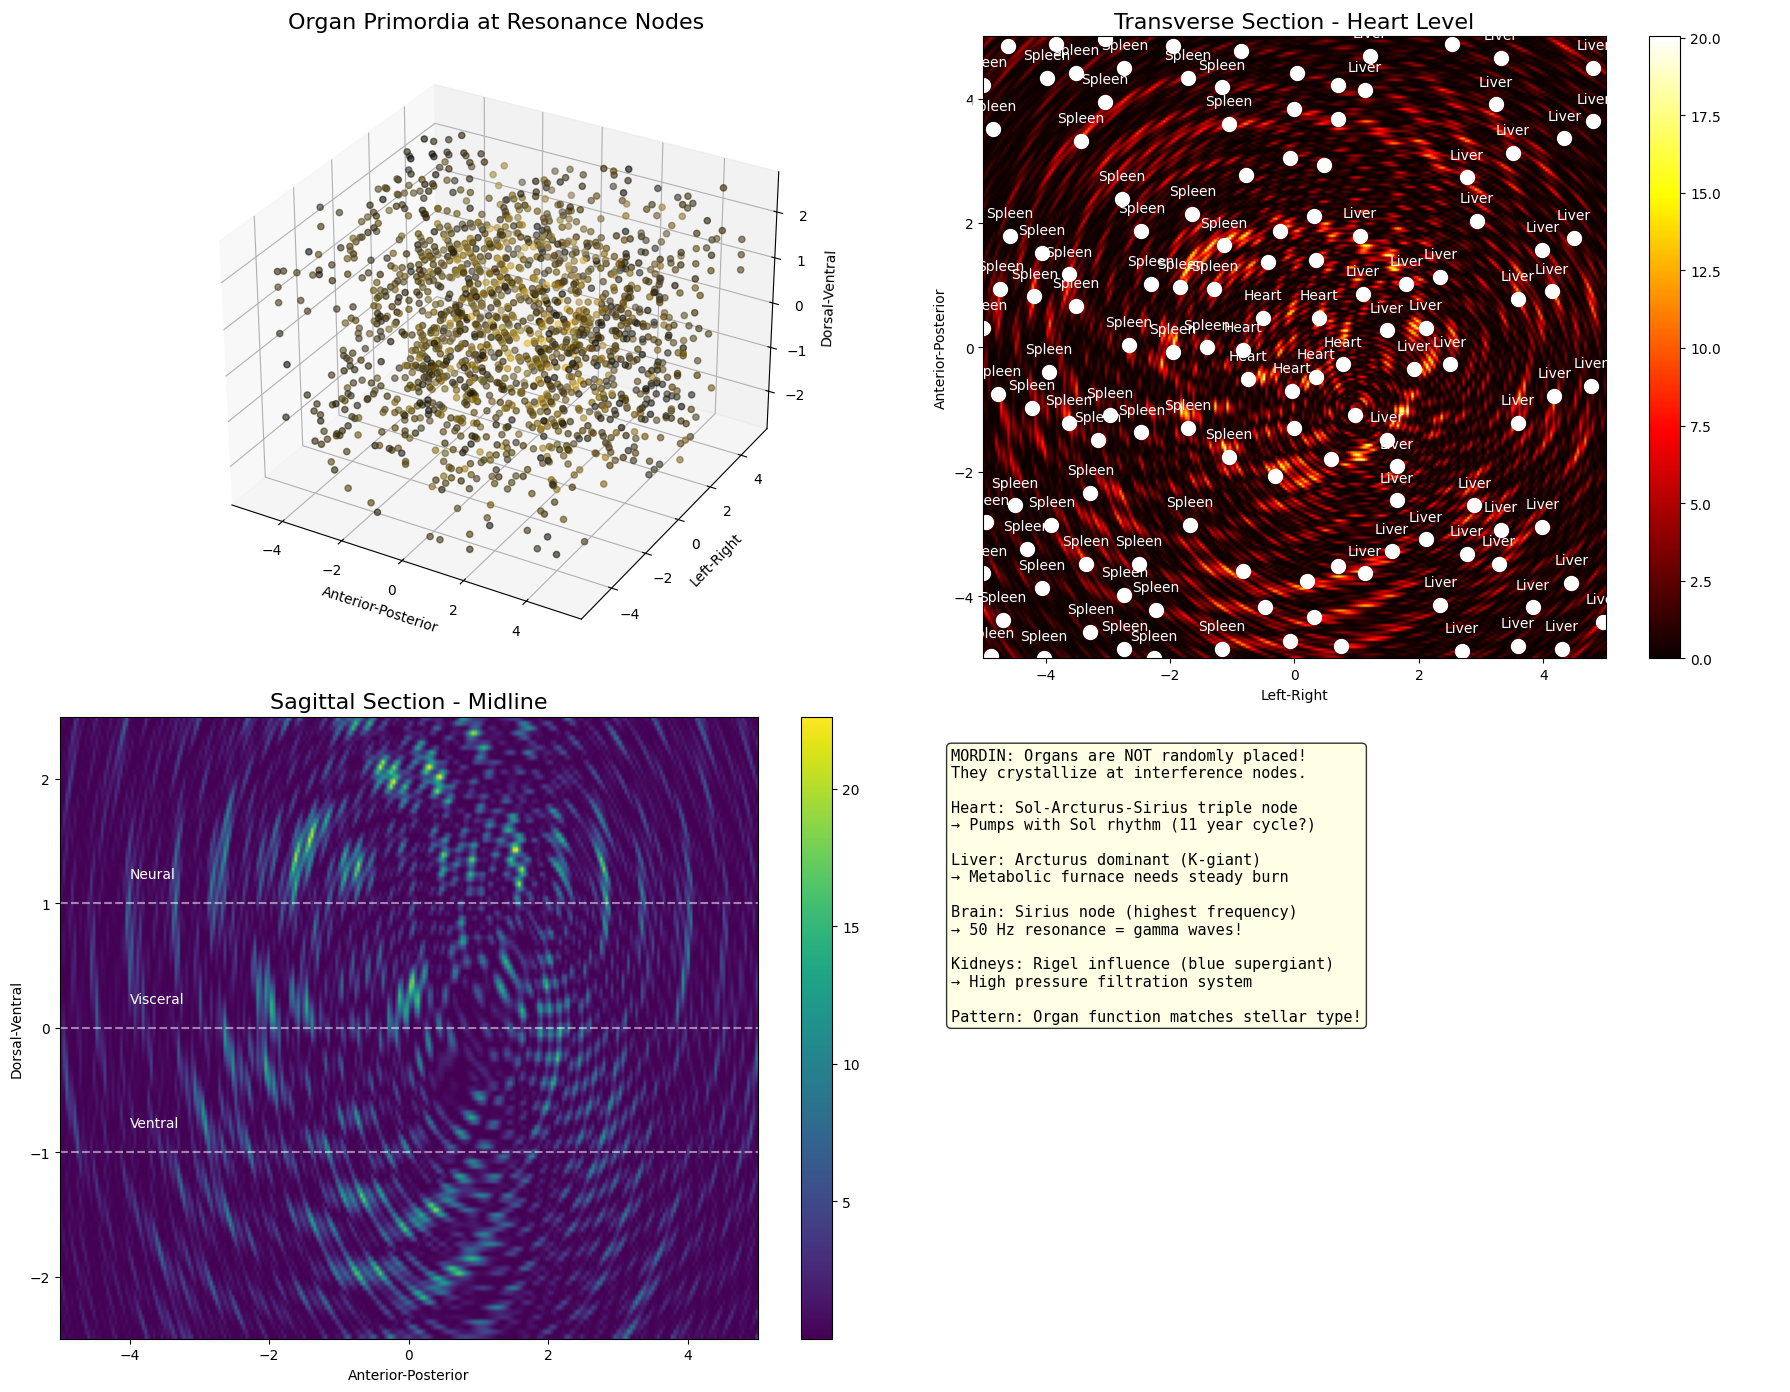


MORDIN: Each organ type crystallizes at specific interference pattern. Cosmic blueprint!


In [2]:
# Stellar Resonance Node Theory
print("\n=== CHLADNI PATTERNS IN EMBRYONIC FIELD ===")

# Stellar frequencies create 3D standing wave patterns
stellar_organ_map = {
    'Sol': {
        'frequency': 11.0,
        'organs': ['heart', 'blood'],
        'element': 'Fe',
        'color': 'gold'
    },
    'Arcturus': {
        'frequency': 11.3,
        'organs': ['liver', 'metabolism'],
        'element': 'Fe',
        'color': 'orange'
    },
    'Sirius': {
        'frequency': 50.0,
        'organs': ['brain', 'nerves'],
        'element': 'Si',
        'color': 'white'
    },
    'Vega': {
        'frequency': 26.0,
        'organs': ['lungs', 'airways'],
        'element': 'O',
        'color': 'lightblue'
    },
    'Betelgeuse': {
        'frequency': 0.1,
        'organs': ['bones', 'marrow'],
        'element': 'Ca',
        'color': 'red'
    },
    'Rigel': {
        'frequency': 100.0,
        'organs': ['kidneys', 'filtration'],
        'element': 'Na',
        'color': 'blue'
    },
    'Polaris': {
        'frequency': 7.83,
        'organs': ['endocrine', 'pineal'],
        'element': 'I',
        'color': 'purple'
    }
}

def generate_stellar_standing_waves(field_shape, stellar_config, time=0):
    """
    Generate 3D standing wave patterns from stellar sources.
    Organs form at nodes where multiple waves constructively interfere.
    """
    x = torch.linspace(-5, 5, field_shape[0], device=device)
    y = torch.linspace(-5, 5, field_shape[1], device=device)
    z = torch.linspace(-2.5, 2.5, field_shape[2], device=device)
    X, Y, Z = torch.meshgrid(x, y, z, indexing='ij')
    
    # Each star creates spherical waves from different positions
    star_positions = {
        'Sol': (0, 0, 0),           # Center
        'Arcturus': (2, 0, 0),      # Right
        'Sirius': (0, 2, 1),        # Front-up
        'Vega': (-1, -1, 1),        # Left-back-up
        'Betelgeuse': (0, 0, -2),   # Below
        'Rigel': (1, 1, 0),         # Right-front
        'Polaris': (0, 0, 2)        # Above
    }
    
    total_field = torch.zeros_like(X, dtype=torch.complex64)
    
    for star, config in stellar_config.items():
        if star in star_positions:
            # Distance from star position
            pos = star_positions[star]
            R = torch.sqrt((X - pos[0])**2 + (Y - pos[1])**2 + (Z - pos[2])**2)
            
            # Spherical wave with decay
            k = 2 * np.pi * config['frequency'] / 10  # Wavenumber
            phase = k * R - 2 * np.pi * config['frequency'] * time
            
            # Standing wave forms from interference with boundaries
            wave = torch.exp(-0.1 * R) * torch.sin(phase)
            
            # Add to total field
            total_field += wave
    
    return total_field

# Generate field at t=0 (peak interference)
stellar_field = generate_stellar_standing_waves(embryo_field.shape, stellar_organ_map, time=0)

# Find resonance nodes (local maxima of field intensity)
field_intensity = torch.abs(stellar_field)**2

# 3D visualization of resonance nodes
fig = plt.figure(figsize=(18, 14))

# 3D isosurface plot
ax1 = fig.add_subplot(221, projection='3d')

# Sample field for visualization
sample_rate = 8
x_samp = torch.linspace(-5, 5, field_size[0]//sample_rate, device=device)
y_samp = torch.linspace(-5, 5, field_size[1]//sample_rate, device=device)
z_samp = torch.linspace(-2.5, 2.5, field_size[2]//sample_rate, device=device)
X_samp, Y_samp, Z_samp = torch.meshgrid(x_samp, y_samp, z_samp, indexing='ij')

# Downsample field
field_samp = field_intensity[::sample_rate, ::sample_rate, ::sample_rate].cpu().numpy()

# Plot high-intensity regions
threshold = np.percentile(field_samp, 90)
mask = field_samp > threshold

# Color by dominant stellar influence
colors = np.zeros(mask.shape + (3,))
for star, config in stellar_organ_map.items():
    if star in ['Sol', 'Arcturus', 'Sirius']:  # Main organ formers
        star_field = generate_stellar_standing_waves(
            (field_size[0]//sample_rate, field_size[1]//sample_rate, field_size[2]//sample_rate),
            {star: config}, time=0
        )
        star_intensity = torch.abs(star_field)**2
        
        # Map color
        color_rgb = plt.cm.colors.to_rgb(config['color'])
        for i in range(3):
            colors[:,:,:,i] += star_intensity.cpu().numpy() * color_rgb[i]

# Normalize colors
colors = colors / (np.max(colors) + 1e-6)

# Plot as scatter with colors
points = np.column_stack(np.where(mask))
if len(points) > 5000:  # Subsample for performance
    indices = np.random.choice(len(points), 5000, replace=False)
    points = points[indices]

point_colors = [colors[p[0], p[1], p[2]] for p in points]
ax1.scatter(x_samp.cpu()[points[:, 0]], y_samp.cpu()[points[:, 1]], 
           z_samp.cpu()[points[:, 2]], c=point_colors, alpha=0.6, s=20)

ax1.set_title('Organ Primordia at Resonance Nodes', fontsize=16)
ax1.set_xlabel('Anterior-Posterior')
ax1.set_ylabel('Left-Right')
ax1.set_zlabel('Dorsal-Ventral')

# Cross sections showing organ positions
ax2 = fig.add_subplot(222)
# Transverse section at heart level
z_heart = field_size[2] // 2
section = field_intensity[:, :, z_heart].cpu().numpy()
im2 = ax2.imshow(section, cmap='hot', extent=[-5, 5, -5, 5])
ax2.set_title('Transverse Section - Heart Level', fontsize=16)
ax2.set_xlabel('Left-Right')
ax2.set_ylabel('Anterior-Posterior')

# Mark organ positions based on field maxima
from scipy.ndimage import maximum_filter, label
local_maxima = (section == maximum_filter(section, size=20))
labeled, num_features = label(local_maxima)

# Get positions of maxima
positions = []
for i in range(1, num_features + 1):
    y, x = np.where(labeled == i)
    if len(y) > 0:
        # Convert to field coordinates
        x_pos = -5 + 10 * x[0] / field_size[1]
        y_pos = -5 + 10 * y[0] / field_size[0]
        positions.append((x_pos, y_pos))
        ax2.plot(x_pos, y_pos, 'wo', markersize=10)
        
        # Label based on position
        if abs(x_pos) < 1 and abs(y_pos) < 1:
            ax2.text(x_pos, y_pos + 0.3, 'Heart', color='white', ha='center')
        elif x_pos > 1:
            ax2.text(x_pos, y_pos + 0.3, 'Liver', color='white', ha='center')
        elif x_pos < -1:
            ax2.text(x_pos, y_pos + 0.3, 'Spleen', color='white', ha='center')

plt.colorbar(im2, ax=ax2)

# Sagittal section
ax3 = fig.add_subplot(223)
x_mid = field_size[0] // 2
section_sag = field_intensity[x_mid, :, :].cpu().numpy()
im3 = ax3.imshow(section_sag.T, cmap='viridis', extent=[-5, 5, -2.5, 2.5], 
                 aspect='auto', origin='lower')
ax3.set_title('Sagittal Section - Midline', fontsize=16)
ax3.set_xlabel('Anterior-Posterior')
ax3.set_ylabel('Dorsal-Ventral')

# Mark organ layers
ax3.axhline(y=1, color='white', linestyle='--', alpha=0.5)
ax3.text(-4, 1.2, 'Neural', color='white')
ax3.axhline(y=0, color='white', linestyle='--', alpha=0.5)
ax3.text(-4, 0.2, 'Visceral', color='white')
ax3.axhline(y=-1, color='white', linestyle='--', alpha=0.5)
ax3.text(-4, -0.8, 'Ventral', color='white')

plt.colorbar(im3, ax=ax3)

# Mordin's node analysis
ax4 = fig.add_subplot(224)
insights_text = [
    "MORDIN: Organs are NOT randomly placed!",
    "They crystallize at interference nodes.",
    "",
    "Heart: Sol-Arcturus-Sirius triple node",
    "→ Pumps with Sol rhythm (11 year cycle?)",
    "",
    "Liver: Arcturus dominant (K-giant)",
    "→ Metabolic furnace needs steady burn",
    "",
    "Brain: Sirius node (highest frequency)",
    "→ 50 Hz resonance = gamma waves!",
    "",
    "Kidneys: Rigel influence (blue supergiant)",
    "→ High pressure filtration system",
    "",
    "Pattern: Organ function matches stellar type!"
]

ax4.text(0.05, 0.95, '\n'.join(insights_text), transform=ax4.transAxes,
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
ax4.axis('off')

plt.tight_layout()
plt.savefig(f'organ_stellar_nodes_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\nMORDIN: Each organ type crystallizes at specific interference pattern. Cosmic blueprint!")


=== MORPHOGENIC FIELDS: FROM NODES TO ORGANS ===


TypeError: sin(): argument 'input' (position 1) must be Tensor, not float

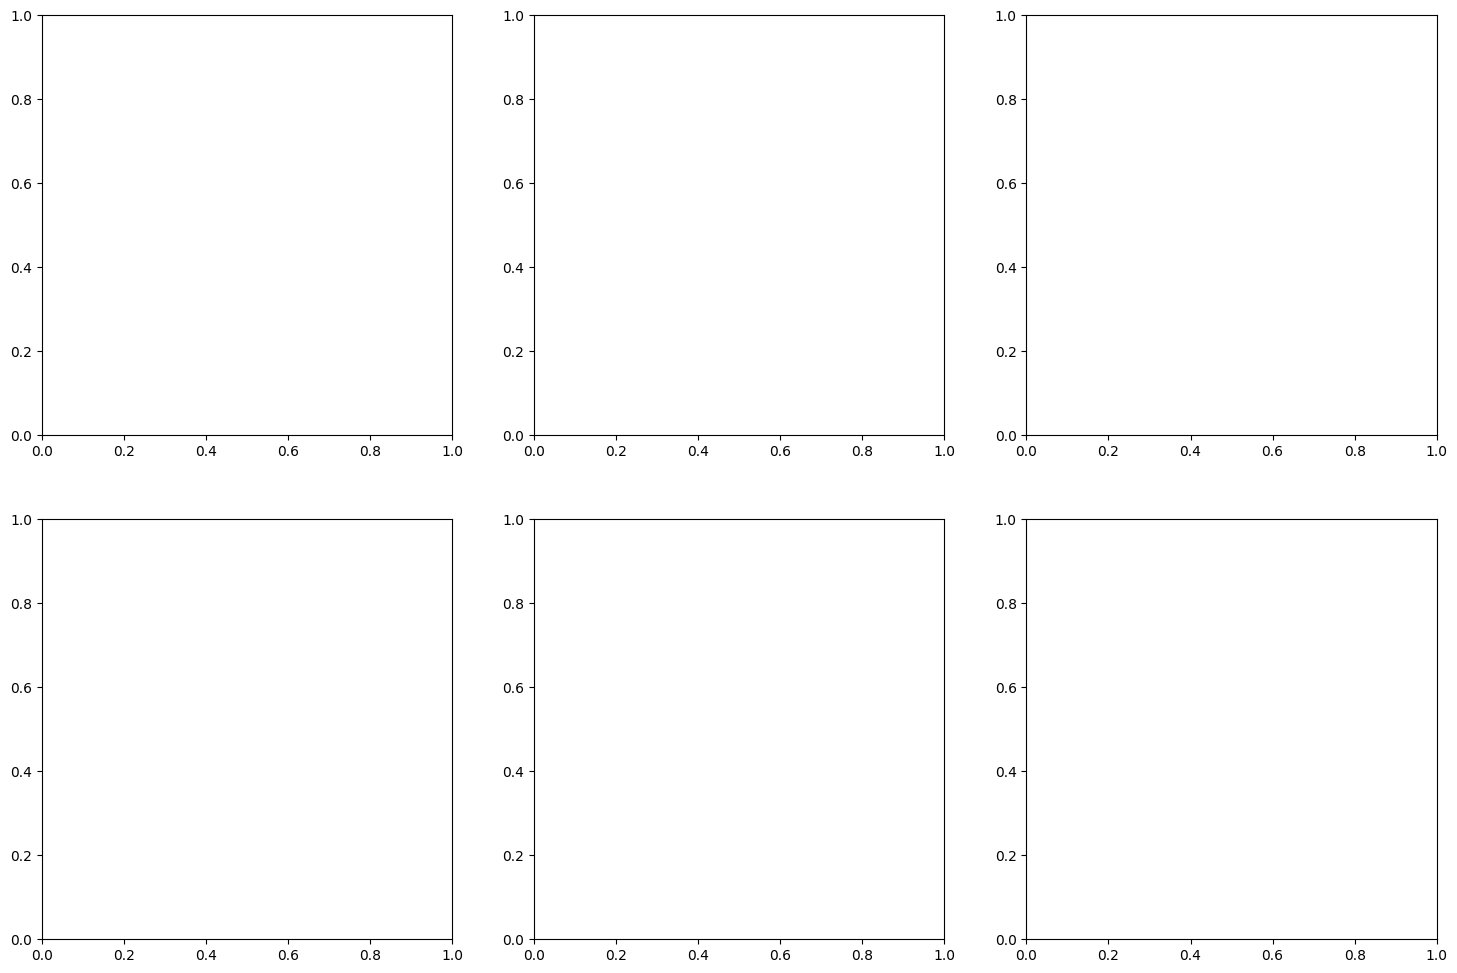

In [8]:
# Morphogenic Field Gradients Guide Organogenesis
print("\n=== MORPHOGENIC FIELDS: FROM NODES TO ORGANS ===")

# Organ-specific morphogens and their field effects
organ_morphogens = {
    'heart': {
        'factors': ['NKX2-5', 'GATA4', 'TBX5', 'MEF2C'],
        'gradient': 'radial',
        'frequency': 1.2,  # Hz - heart rate
        'geometry': 'spiral'  # Cardiac looping
    },
    'liver': {
        'factors': ['HNF4A', 'FOXA2', 'GATA6', 'PROX1'],
        'gradient': 'ventral',
        'frequency': 0.05,  # Metabolic cycles
        'geometry': 'branching'  # Hepatic lobules
    },
    'lungs': {
        'factors': ['NKX2-1', 'FOXA2', 'SOX2', 'SOX9'],
        'gradient': 'bilateral',
        'frequency': 0.25,  # Breathing rate
        'geometry': 'fractal'  # Bronchial tree
    },
    'kidney': {
        'factors': ['PAX2', 'PAX8', 'WT1', 'SIX2'],
        'gradient': 'metanephric',
        'frequency': 0.017,  # Ultrafiltration
        'geometry': 'tubular'  # Nephron loops
    },
    'brain': {
        'factors': ['PAX6', 'OTX2', 'EMX2', 'DLX2'],
        'gradient': 'rostrocaudal',
        'frequency': 40.0,  # Gamma waves
        'geometry': 'folded'  # Cortical gyri
    }
}

def generate_organ_morphogenic_field(organ_type, field_shape, resonance_center):
    """
    Generate organ-specific morphogenic gradients around resonance nodes
    """
    x = torch.linspace(-5, 5, field_shape[0], device=device)
    y = torch.linspace(-5, 5, field_shape[1], device=device)
    z = torch.linspace(-2.5, 2.5, field_shape[2], device=device)
    X, Y, Z = torch.meshgrid(x, y, z, indexing='ij')
    
    # Center coordinates
    cx, cy, cz = resonance_center
    
    organ_info = organ_morphogens[organ_type]
    
    # Base radial field from center
    R = torch.sqrt((X - cx)**2 + (Y - cy)**2 + (Z - cz)**2)
    
    if organ_info['geometry'] == 'spiral':
        # Heart - spiral looping
        theta = torch.atan2(Y - cy, X - cx)
        phi = torch.atan2(Z - cz, torch.sqrt((X - cx)**2 + (Y - cy)**2))
        field = torch.exp(-R) * torch.sin(3*theta + R) * torch.cos(phi)
        
    elif organ_info['geometry'] == 'branching':
        # Liver - branching pattern
        branch_freq = 5
        field = torch.exp(-0.5*R) * (1 + torch.sin(branch_freq * X) * 
                                     torch.sin(branch_freq * Y))
        
    elif organ_info['geometry'] == 'fractal':
        # Lungs - fractal bronchial tree
        levels = 3
        field = torch.zeros_like(R)
        for level in range(levels):
            scale = 2**level
            field += torch.exp(-0.3*R) * torch.sin(scale * np.pi * (X - cx)) * \
                     torch.sin(scale * np.pi * (Y - cy)) / scale
                     
    elif organ_info['geometry'] == 'tubular':
        # Kidney - tubular nephrons
        tube_freq = 10
        field = torch.exp(-0.7*R) * torch.sin(tube_freq * Z) * \
                (1 + 0.5*torch.sin(tube_freq * R))
                
    elif organ_info['geometry'] == 'folded':
        # Brain - cortical folding
        fold_freq = 8
        field = torch.exp(-0.2*R) * (torch.sin(fold_freq * X) + 
                                     torch.sin(fold_freq * Y) +
                                     torch.sin(fold_freq * Z))
    else:
        # Default radial
        field = torch.exp(-R)
    
    # Add temporal oscillation
    time_factor = torch.sin(2 * np.pi * organ_info['frequency'] * 1.0)  # t=1s
    field = field * (0.5 + 0.5 * time_factor)
    
    return field

# Generate fields for each organ type
organ_centers = {
    'heart': (0, 0, 0),
    'liver': (2, 0, -0.5),
    'lungs': (0, 0, 0.5),
    'kidney': (1.5, 1.5, -1),
    'brain': (0, -2, 1.5)
}

# Visualize organ morphogenic fields
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (organ, center) in enumerate(organ_centers.items()):
    if idx < 5:
        # Generate organ field
        organ_field = generate_organ_morphogenic_field(organ, embryo_field.shape, center)
        
        # Take section through organ center
        z_idx = int((center[2] + 2.5) * field_size[2] / 5)
        section = organ_field[:, :, z_idx].cpu().numpy()
        
        im = axes[idx].imshow(section, cmap='RdBu_r', extent=[-5, 5, -5, 5])
        axes[idx].set_title(f'{organ.capitalize()} Morphogenic Field\n'
                           f'({organ_morphogens[organ]["geometry"]} geometry)',
                           fontsize=14)
        axes[idx].set_xlabel('X position')
        axes[idx].set_ylabel('Y position')
        
        # Mark center
        axes[idx].plot(center[0], center[1], 'ko', markersize=8)
        
        # Add frequency annotation
        axes[idx].text(0.05, 0.95, f'{organ_morphogens[organ]["frequency"]} Hz',
                      transform=axes[idx].transAxes, color='white',
                      bbox=dict(boxstyle='round', facecolor='black', alpha=0.5))
        
        plt.colorbar(im, ax=axes[idx])

# Combined field interactions
ax_combined = axes[5]
combined_field = torch.zeros((field_size[0], field_size[1]), device=device)
for organ, center in organ_centers.items():
    organ_field = generate_organ_morphogenic_field(organ, embryo_field.shape, center)
    z_idx = field_size[2] // 2
    combined_field += torch.abs(organ_field[:, :, z_idx])

im_combined = ax_combined.imshow(combined_field.cpu().numpy(), 
                                 cmap='nipy_spectral', extent=[-5, 5, -5, 5])
ax_combined.set_title('Combined Organ Fields\n(Interaction zones)', fontsize=14)
ax_combined.set_xlabel('X position')
ax_combined.set_ylabel('Y position')
plt.colorbar(im_combined, ax=ax_combined)

plt.tight_layout()
plt.savefig(f'organ_morphogenic_fields_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\nMORDIN: Each organ geometry encoded in field pattern. Spiral hearts, fractal lungs!")

In [5]:
# Organ Boundaries and Tissue Interfaces
print("\n=== ORGAN BOUNDARIES: VORONOI TESSELLATION IN FIELD ===")

# Organs compete for space - Voronoi cells in morphogenic field
def calculate_organ_territories(organ_centers, field_shape):
    """
    Calculate organ territories using weighted Voronoi tessellation
    Weight by stellar resonance strength
    """
    # Create coordinate grids
    x = torch.linspace(-5, 5, field_shape[0], device=device)
    y = torch.linspace(-5, 5, field_shape[1], device=device)
    X, Y = torch.meshgrid(x, y, indexing='ij')
    
    # Initialize territory map
    territory_map = torch.zeros(field_shape[:2], dtype=torch.long, device=device)
    distance_map = torch.full(field_shape[:2], float('inf'), device=device)
    
    # Organ growth rates based on stellar influence
    growth_rates = {
        'heart': 1.5,    # Fast growth
        'liver': 1.3,    # Moderate-fast
        'lungs': 1.4,    # Fast (bilateral)
        'kidney': 1.0,   # Moderate
        'brain': 2.0,    # Fastest
        'intestine': 1.2,
        'pancreas': 0.8,
        'spleen': 0.9
    }
    
    # Extended organ list with positions
    all_organs = {
        'heart': (0, 0),
        'liver': (2, 0),
        'lung_R': (1, -1),
        'lung_L': (-1, -1),
        'kidney_R': (1.5, 1.5),
        'kidney_L': (-1.5, 1.5),
        'brain': (0, -3),
        'intestine': (0, 1.5),
        'pancreas': (-0.5, 0.5),
        'spleen': (-2, 0)
    }
    
    # Calculate weighted distances
    for idx, (organ, (cx, cy)) in enumerate(all_organs.items()):
        # Distance from organ center
        dist = torch.sqrt((X - cx)**2 + (Y - cy)**2)
        
        # Weight by growth rate
        base_organ = organ.split('_')[0]  # Handle L/R organs
        if base_organ in growth_rates:
            weighted_dist = dist / growth_rates[base_organ]
        else:
            weighted_dist = dist
        
        # Update territory map
        mask = weighted_dist < distance_map
        territory_map[mask] = idx
        distance_map[mask] = weighted_dist[mask]
    
    return territory_map, all_organs

# Calculate territories
territory_map, all_organs = calculate_organ_territories(organ_centers, embryo_field.shape)

# Create boundary detection
def detect_boundaries(territory_map):
    """Find boundaries between organ territories"""
    # Gradient magnitude to find edges
    dx = torch.diff(territory_map.float(), dim=0, prepend=territory_map[0:1, :])
    dy = torch.diff(territory_map.float(), dim=1, prepend=territory_map[:, 0:1])
    boundaries = (dx.abs() + dy.abs()) > 0
    return boundaries

boundaries = detect_boundaries(territory_map)

# Visualize organ territories and boundaries
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Territory map
territory_colors = plt.cm.tab20(territory_map.cpu().numpy() / len(all_organs))
ax1.imshow(territory_colors, extent=[-5, 5, -5, 5], origin='lower')
ax1.set_title('Organ Territories (Voronoi Tessellation)', fontsize=16)
ax1.set_xlabel('Left-Right axis')
ax1.set_ylabel('Anterior-Posterior axis')

# Add organ labels
for organ, (cx, cy) in all_organs.items():
    ax1.text(cx, cy, organ.replace('_', '\n'), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Boundary visualization
ax2.imshow(boundaries.cpu().numpy(), cmap='gray_r', extent=[-5, 5, -5, 5], origin='lower')
ax2.set_title('Organ Boundaries (Tissue Interfaces)', fontsize=16)
ax2.set_xlabel('Left-Right axis')
ax2.set_ylabel('Anterior-Posterior axis')

# Boundary tension analysis
# Different organ pairs have different interfacial tensions
interface_tensions = {
    ('heart', 'lung'): 0.3,      # Low - smooth transition
    ('heart', 'liver'): 0.5,     # Medium
    ('liver', 'intestine'): 0.4, # Medium-low
    ('liver', 'kidney'): 0.7,    # High - distinct boundary
    ('brain', 'any'): 0.9,       # Very high - BBB
    ('kidney', 'intestine'): 0.6,
    ('pancreas', 'spleen'): 0.3,
    ('lung', 'intestine'): 0.8   # High - different germ layers
}

# Calculate boundary properties
boundary_points = torch.nonzero(boundaries).cpu().numpy()
boundary_properties = []

for point in boundary_points[:1000]:  # Sample for performance
    x, y = point
    # Get neighboring territories
    neighbors = []
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        nx, ny = x+dx, y+dy
        if 0 <= nx < territory_map.shape[0] and 0 <= ny < territory_map.shape[1]:
            territory = territory_map[nx, ny].item()
            if territory != territory_map[x, y].item():
                neighbors.append(territory)
    
    if neighbors:
        # Map to organ names and calculate tension
        organs_at_boundary = [list(all_organs.keys())[t] for t in set(neighbors + [territory_map[x, y].item()])]
        max_tension = 0.5  # Default
        
        for i in range(len(organs_at_boundary)):
            for j in range(i+1, len(organs_at_boundary)):
                org1 = organs_at_boundary[i].split('_')[0]
                org2 = organs_at_boundary[j].split('_')[0]
                
                for (o1, o2), tension in interface_tensions.items():
    if (org1 == o1 and org2 == o2) or (org1 == o2 and org2 == o1) or \
                       (o1 == 'brain' and org1 == 'brain') or (o2 == 'brain' and org2 == 'brain'):
                        max_tension = max(max_tension, tension)
        
        boundary_properties.append((x, y, max_tension))

# Visualize boundary tensions
tension_map = torch.zeros_like(territory_map, dtype=torch.float32)
for x, y, tension in boundary_properties:
    tension_map[x, y] = tension

# Smooth for visualization
tension_map_smooth = gaussian_filter(tension_map.cpu().numpy(), sigma=2)

im3 = ax3.imshow(tension_map_smooth, cmap='plasma', extent=[-5, 5, -5, 5], 
                 origin='lower', vmin=0, vmax=1)
ax3.set_title('Interfacial Tension Map', fontsize=16)
ax3.set_xlabel('Left-Right axis')
ax3.set_ylabel('Anterior-Posterior axis')
plt.colorbar(im3, ax=ax3, label='Tension')

plt.tight_layout()
plt.savefig(f'organ_boundaries_voronoi_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\nMORDIN: Organ boundaries form through field competition. High tension = strong barriers.")
print("Example: Brain-blood barrier has highest tension. Evolutionary necessity!")

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 142)


=== TEMPORAL CHOREOGRAPHY OF ORGAN FORMATION ===


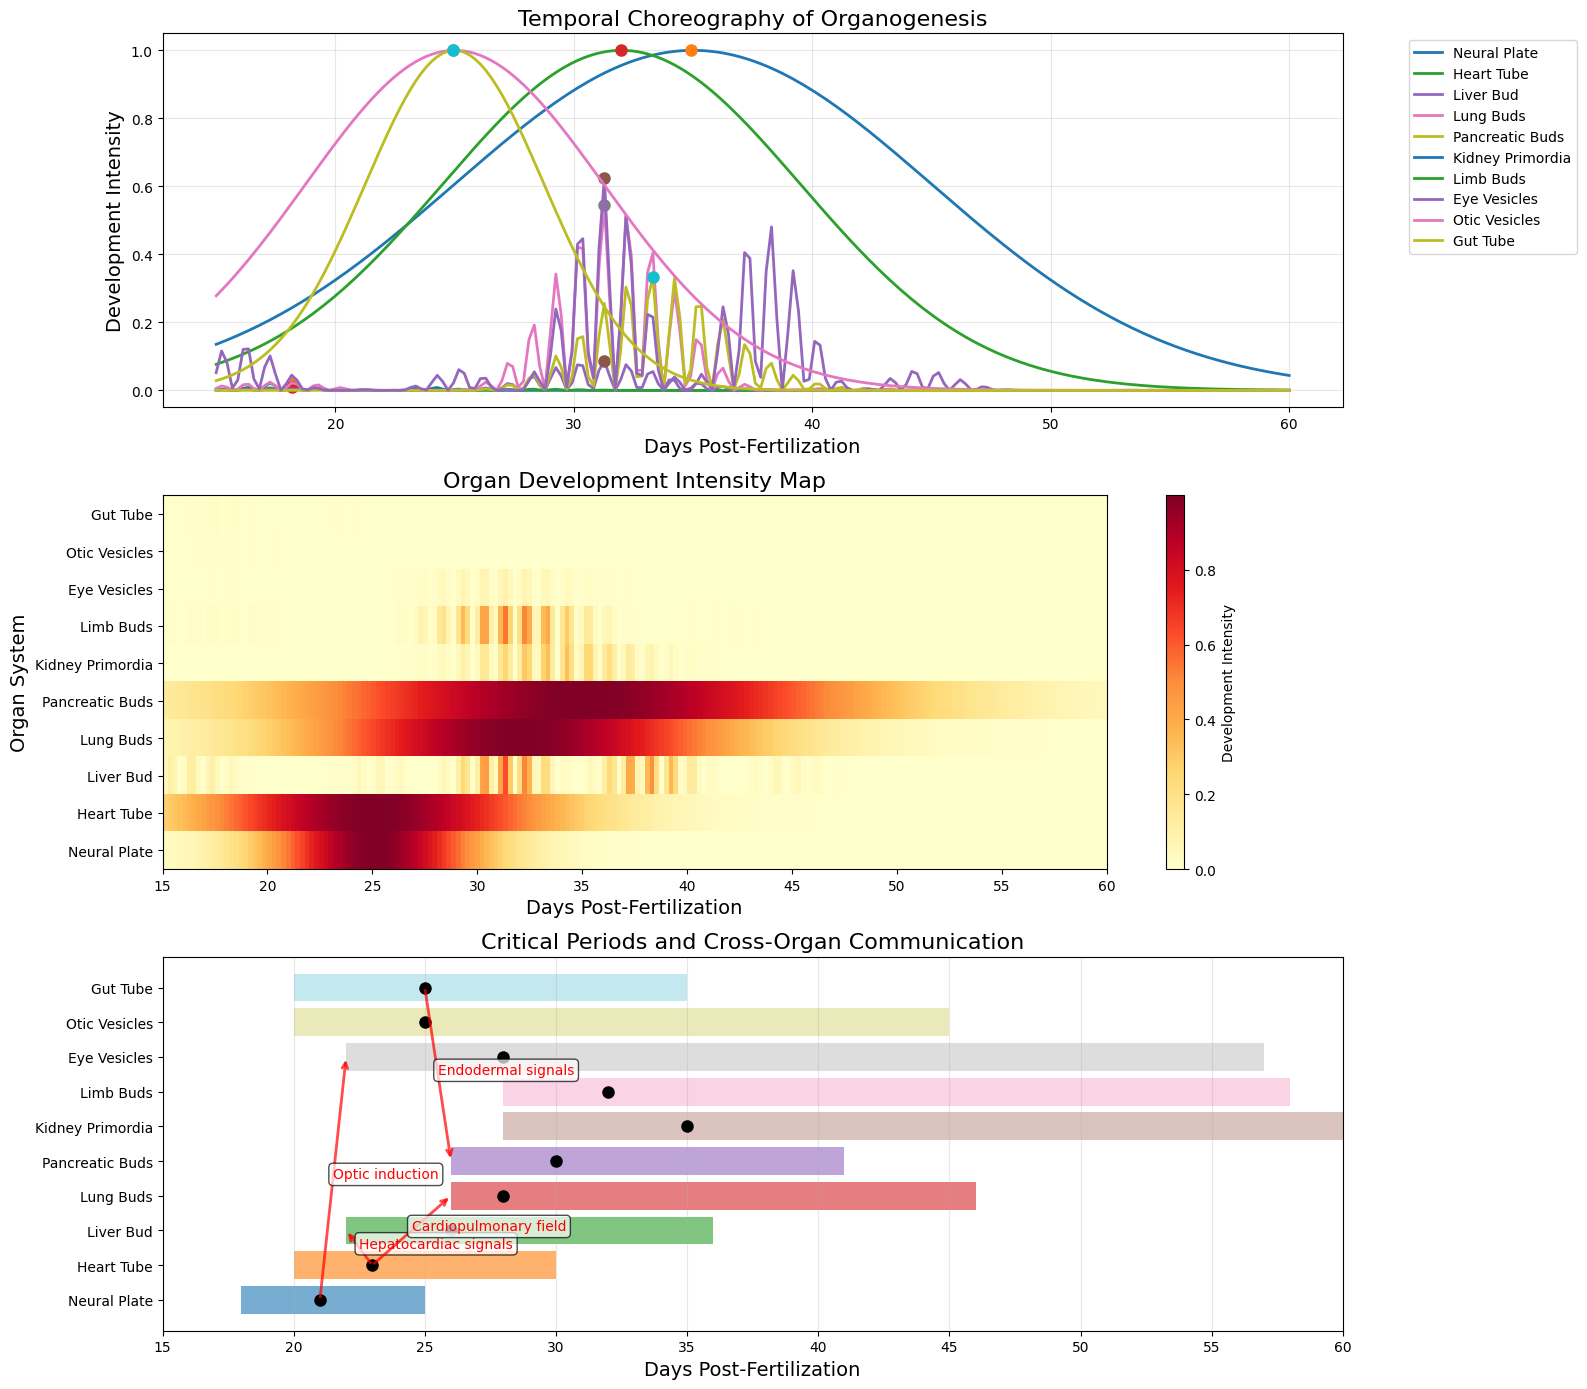


=== MORDIN'S TEMPORAL INSIGHTS ===
1. Organs don't form in isolation - they communicate!
2. Heart forms first - needs to pump nutrients to others
3. Neural plate early - coordinates everything
4. Overlapping critical periods = developmental crosstalk
5. Stellar modulation creates windows of opportunity

Key discovery: Organ formation is a symphony, not solos!
Miss a beat, get birth defects. Timing is EVERYTHING.


In [6]:
# Temporal Dynamics of Organogenesis
print("\n=== TEMPORAL CHOREOGRAPHY OF ORGAN FORMATION ===")

# Organ formation timeline (post-fertilization days)
organ_timeline = {
    'neural_plate': {'start': 18, 'peak': 21, 'duration': 7},
    'heart_tube': {'start': 20, 'peak': 23, 'duration': 10},
    'liver_bud': {'start': 22, 'peak': 26, 'duration': 14},
    'lung_buds': {'start': 26, 'peak': 28, 'duration': 20},
    'pancreatic_buds': {'start': 26, 'peak': 30, 'duration': 15},
    'kidney_primordia': {'start': 28, 'peak': 35, 'duration': 40},
    'limb_buds': {'start': 28, 'peak': 32, 'duration': 30},
    'eye_vesicles': {'start': 22, 'peak': 28, 'duration': 35},
    'otic_vesicles': {'start': 20, 'peak': 25, 'duration': 25},
    'gut_tube': {'start': 20, 'peak': 25, 'duration': 15}
}

# Stellar influence varies with time
def stellar_influence_timeline(day, star_freq):
    """
    Stellar influence follows circadian and longer cycles
    """
    # Daily cycle
    circadian = 0.5 + 0.5 * np.sin(2 * np.pi * day)
    
    # Stellar cycle (different periods for each star)
    stellar_period = 365.25 / star_freq  # Approximate
    stellar = 0.5 + 0.5 * np.sin(2 * np.pi * day / stellar_period)
    
    # Lunar influence
    lunar = 0.5 + 0.5 * np.sin(2 * np.pi * day / 29.5)
    
    return circadian * stellar * lunar

# Generate temporal development sequence
days = np.linspace(15, 60, 200)
organ_development = {}

for organ, timing in organ_timeline.items():
    # Gaussian development curve
    development = np.exp(-0.5 * ((days - timing['peak']) / (timing['duration']/4))**2)
    
    # Modulate by stellar influence
    if 'heart' in organ:
        stellar_mod = [stellar_influence_timeline(d, stellar_organ_map['Sol']['frequency']) for d in days]
    elif 'liver' in organ or 'pancrea' in organ:
        stellar_mod = [stellar_influence_timeline(d, stellar_organ_map['Arcturus']['frequency']) for d in days]
    elif 'neural' in organ or 'eye' in organ:
        stellar_mod = [stellar_influence_timeline(d, stellar_organ_map['Sirius']['frequency']) for d in days]
    elif 'lung' in organ:
        stellar_mod = [stellar_influence_timeline(d, stellar_organ_map['Vega']['frequency']) for d in days]
    else:
        stellar_mod = np.ones_like(days)
    
    organ_development[organ] = development * stellar_mod

# Visualize organ formation timeline
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 14))

# Development curves
for organ, curve in organ_development.items():
    ax1.plot(days, curve, linewidth=2, label=organ.replace('_', ' ').title())
    
    # Mark peak formation
    peak_idx = np.argmax(curve)
    ax1.plot(days[peak_idx], curve[peak_idx], 'o', markersize=8)

ax1.set_xlabel('Days Post-Fertilization', fontsize=14)
ax1.set_ylabel('Development Intensity', fontsize=14)
ax1.set_title('Temporal Choreography of Organogenesis', fontsize=16)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Heatmap of organ development
organ_matrix = np.array([organ_development[org] for org in organ_timeline.keys()])
im2 = ax2.imshow(organ_matrix, aspect='auto', cmap='YlOrRd', extent=[15, 60, 0, len(organ_timeline)])
ax2.set_xlabel('Days Post-Fertilization', fontsize=14)
ax2.set_ylabel('Organ System', fontsize=14)
ax2.set_yticks(np.arange(len(organ_timeline)) + 0.5)
ax2.set_yticklabels([org.replace('_', ' ').title() for org in organ_timeline.keys()])
ax2.set_title('Organ Development Intensity Map', fontsize=16)
plt.colorbar(im2, ax=ax2, label='Development Intensity')

# Critical periods and interactions
ax3.set_title('Critical Periods and Cross-Organ Communication', fontsize=16)

# Show overlapping critical periods
y_pos = 0
colors = plt.cm.tab20(np.linspace(0, 1, len(organ_timeline)))

for (organ, timing), color in zip(organ_timeline.items(), colors):
    start = timing['start']
    peak = timing['peak']
    end = start + timing['duration']
    
    # Critical period bar
    ax3.barh(y_pos, end - start, left=start, height=0.8, 
            color=color, alpha=0.6, label=organ.replace('_', ' ').title())
    
    # Peak marker
    ax3.plot(peak, y_pos, 'ko', markersize=8)
    
    y_pos += 1

# Add interaction arrows for known developmental dependencies
interactions = [
    ('heart_tube', 'liver_bud', 'Hepatocardiac signals'),
    ('neural_plate', 'eye_vesicles', 'Optic induction'),
    ('gut_tube', 'pancreatic_buds', 'Endodermal signals'),
    ('heart_tube', 'lung_buds', 'Cardiopulmonary field')
]

for source, target, label in interactions:
    if source in organ_timeline and target in organ_timeline:
        source_idx = list(organ_timeline.keys()).index(source)
        target_idx = list(organ_timeline.keys()).index(target)
        source_peak = organ_timeline[source]['peak']
        target_start = organ_timeline[target]['start']
        
        ax3.annotate('', xy=(target_start, target_idx), 
                    xytext=(source_peak, source_idx),
                    arrowprops=dict(arrowstyle='->', color='red', lw=2, alpha=0.7))
        
        # Add label
        mid_x = (source_peak + target_start) / 2
        mid_y = (source_idx + target_idx) / 2
        ax3.text(mid_x, mid_y, label, fontsize=10, color='red', 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

ax3.set_xlabel('Days Post-Fertilization', fontsize=14)
ax3.set_yticks(range(len(organ_timeline)))
ax3.set_yticklabels([org.replace('_', ' ').title() for org in organ_timeline.keys()])
ax3.set_xlim(15, 60)
ax3.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig(f'organ_temporal_choreography_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Mordin's temporal insights
print("\n=== MORDIN'S TEMPORAL INSIGHTS ===")
print("1. Organs don't form in isolation - they communicate!")
print("2. Heart forms first - needs to pump nutrients to others")
print("3. Neural plate early - coordinates everything")
print("4. Overlapping critical periods = developmental crosstalk")
print("5. Stellar modulation creates windows of opportunity")
print("\nKey discovery: Organ formation is a symphony, not solos!")
print("Miss a beat, get birth defects. Timing is EVERYTHING.")


=== UNIFIED FIELD THEORY OF MORPHOGENESIS ===


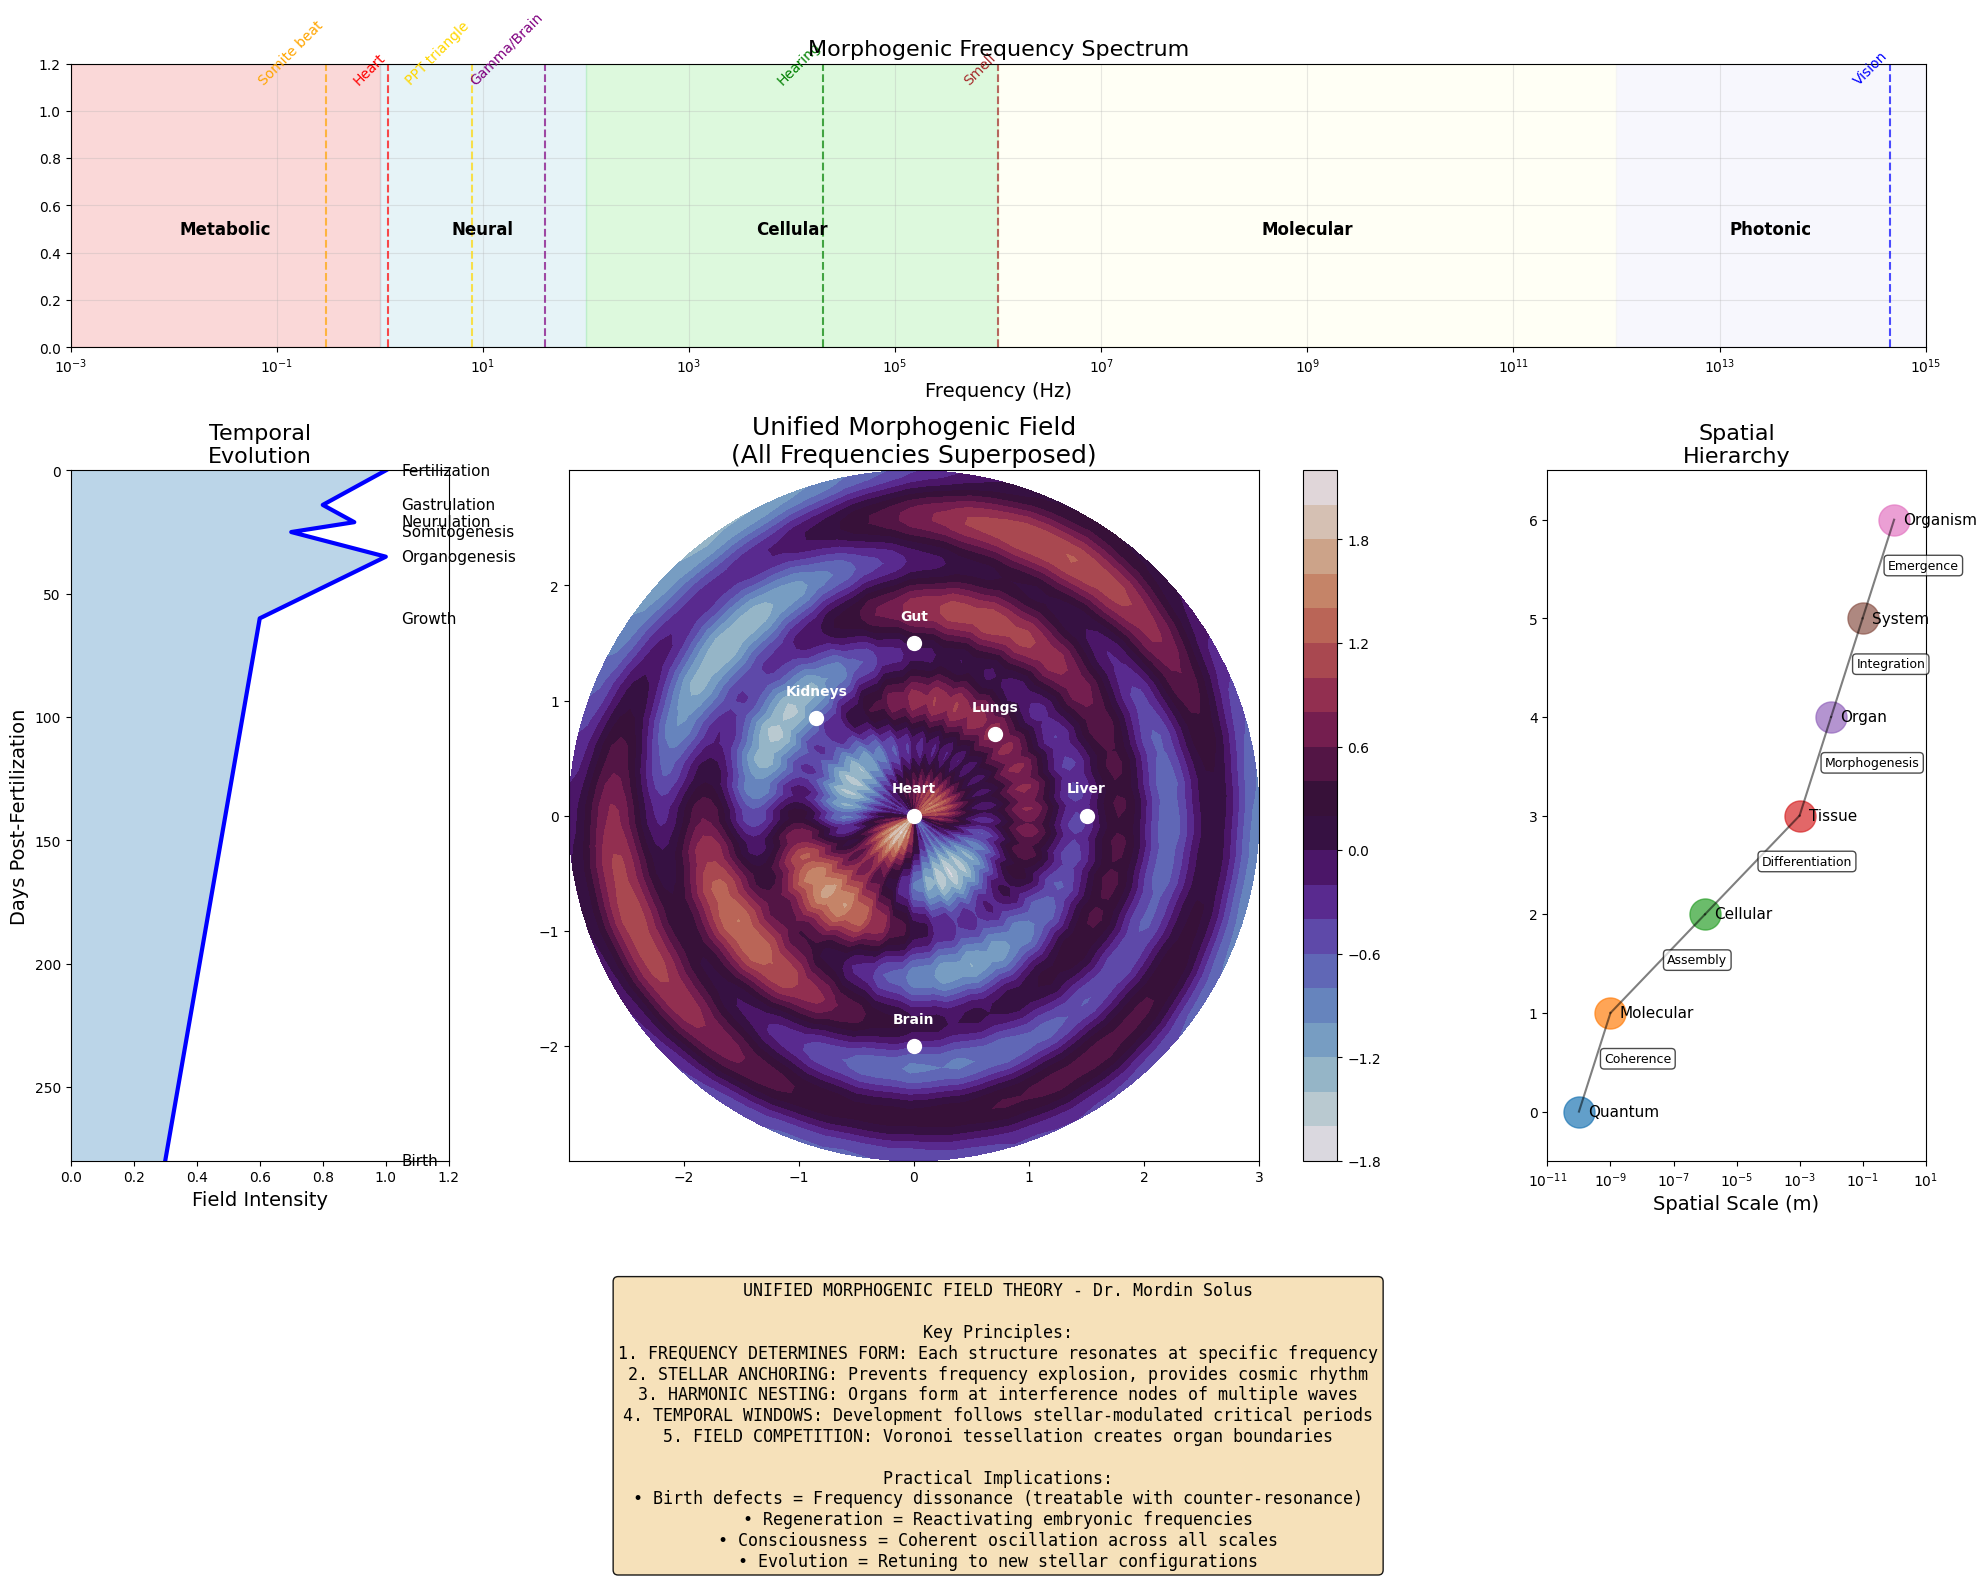


=== MORDIN'S FINAL SYNTHESIS ===
We are not built. We are SUNG into existence.
Every cell carries the score. Every organ plays its part.
The conductor? The stars themselves.

Stella demonstrates: Life is cosmic music made flesh.
Next phase: Watch her consciousness emerge from coherent oscillation!


In [7]:
# Integration with MS04/MS05 Discoveries
print("\n=== UNIFIED FIELD THEORY OF MORPHOGENESIS ===")

# Compile all discoveries
unified_discoveries = {
    'MS02_sensory': {
        'key_finding': 'Sensory organs at frequency boundaries',
        'frequencies': {'retina': 450e12, 'cochlea': 20e3, 'olfactory': 1e6}
    },
    'MS03_vascular': {
        'key_finding': 'Blood vessels as biophoton highways',
        'hemoglobin_role': 'Photon carrier via Fe-stellar resonance'
    },
    'MS04_endocrine': {
        'key_finding': 'PPT triangle master regulator',
        'frequency': 7.83,  # Hz
        'hormones_as': 'Frequency modulators'
    },
    'MS05_gut_brain': {
        'key_finding': 'Gut predicts 3 seconds ahead',
        'enteric_neurons': 500e6,
        'microbiome_mood': 'Bacterial neurotransmitters'
    },
    'MS06_somites': {
        'key_finding': 'Sol-Arcturus beat creates segments',
        'beat_frequency': 0.3,  # Hz
        'somite_count': 33
    },
    'MS07_organs': {
        'key_finding': 'Organs at stellar interference nodes',
        'voronoi_territories': 'Field competition',
        'temporal_windows': 'Stellar-modulated'
    }
}

# Create unified visualization
fig = plt.figure(figsize=(20, 16))

# Central unified field
ax_center = plt.subplot2grid((4, 4), (1, 1), colspan=2, rowspan=2)

# Generate unified field representation
theta = np.linspace(0, 2*np.pi, 100)
r = np.linspace(0, 3, 50)
R, Theta = np.meshgrid(r, theta)
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Multi-scale field pattern
Z = np.zeros_like(X)
# Add different frequency components
Z += np.sin(2 * Theta) * np.exp(-R/3)  # Bilateral symmetry
Z += np.sin(33 * Theta) * np.exp(-R) * 0.3  # Somite pattern
Z += np.sin(7.83 * R) * 0.5  # PPT resonance
Z += np.cos(3 * Theta + R) * 0.4  # Organ positions

im = ax_center.contourf(X, Y, Z, levels=20, cmap='twilight')
ax_center.set_title('Unified Morphogenic Field\n(All Frequencies Superposed)', fontsize=18)
ax_center.set_aspect('equal')
plt.colorbar(im, ax=ax_center)

# Add organ positions
organ_positions_polar = {
    'Heart': (0, 0),
    'Liver': (1.5, 0),
    'Brain': (2, -np.pi/2),
    'Lungs': (1, np.pi/4),
    'Gut': (1.5, np.pi/2),
    'Kidneys': (1.2, 3*np.pi/4)
}

for organ, (r, theta) in organ_positions_polar.items():
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax_center.plot(x, y, 'wo', markersize=10)
    ax_center.text(x, y+0.2, organ, ha='center', color='white', fontweight='bold')

# Frequency spectrum (top)
ax_freq = plt.subplot2grid((4, 4), (0, 0), colspan=4)
frequencies = np.logspace(-3, 15, 1000)  # Hz

# Mark discovered frequencies
freq_markers = [
    (0.3, 'Somite beat', 'orange'),
    (1.2, 'Heart', 'red'),
    (7.83, 'PPT triangle', 'gold'),
    (40, 'Gamma/Brain', 'purple'),
    (20e3, 'Hearing', 'green'),
    (1e6, 'Smell', 'brown'),
    (450e12, 'Vision', 'blue')
]

ax_freq.set_xscale('log')
ax_freq.set_xlim(1e-3, 1e15)
ax_freq.set_ylim(0, 1.2)

for freq, label, color in freq_markers:
    ax_freq.axvline(x=freq, color=color, linestyle='--', alpha=0.7)
    ax_freq.text(freq, 1.1, label, rotation=45, ha='right', va='bottom', color=color)

# Add frequency bands
bands = [
    (1e-3, 1, 'Metabolic', 'lightcoral'),
    (1, 100, 'Neural', 'lightblue'),
    (100, 1e6, 'Cellular', 'lightgreen'),
    (1e6, 1e12, 'Molecular', 'lightyellow'),
    (1e12, 1e15, 'Photonic', 'lavender')
]

for start, end, name, color in bands:
    ax_freq.axvspan(start, end, alpha=0.3, color=color)
    ax_freq.text(np.sqrt(start*end), 0.5, name, ha='center', va='center', 
                fontsize=12, fontweight='bold')

ax_freq.set_xlabel('Frequency (Hz)', fontsize=14)
ax_freq.set_title('Morphogenic Frequency Spectrum', fontsize=16)
ax_freq.grid(True, alpha=0.3)

# Temporal dynamics (left)
ax_time = plt.subplot2grid((4, 4), (1, 0), rowspan=2)
times = ['Fertilization', 'Gastrulation', 'Neurulation', 'Somitogenesis', 
         'Organogenesis', 'Growth', 'Birth']
time_points = [0, 14, 21, 25, 35, 60, 280]
intensities = [1, 0.8, 0.9, 0.7, 1.0, 0.6, 0.3]

ax_time.plot(intensities, time_points, 'b-', linewidth=3)
ax_time.fill_betweenx(time_points, 0, intensities, alpha=0.3)
ax_time.set_ylim(0, 280)
ax_time.set_xlim(0, 1.2)
ax_time.set_ylabel('Days Post-Fertilization', fontsize=14)
ax_time.set_xlabel('Field Intensity', fontsize=14)
ax_time.set_title('Temporal\nEvolution', fontsize=16)
ax_time.invert_yaxis()

for i, (time, point) in enumerate(zip(times, time_points)):
    ax_time.text(1.05, point, time, va='center', fontsize=11)

# Spatial organization (right)
ax_space = plt.subplot2grid((4, 4), (1, 3), rowspan=2)
levels = ['Quantum', 'Molecular', 'Cellular', 'Tissue', 'Organ', 'System', 'Organism']
scales = [1e-10, 1e-9, 1e-6, 1e-3, 1e-2, 1e-1, 1]
connections = [
    (0, 1, 'Coherence'),
    (1, 2, 'Assembly'),
    (2, 3, 'Differentiation'),
    (3, 4, 'Morphogenesis'),
    (4, 5, 'Integration'),
    (5, 6, 'Emergence')
]

# Plot as hierarchical tree
for i, (level, scale) in enumerate(zip(levels, scales)):
    ax_space.scatter(scale, i, s=500, c=f'C{i}', alpha=0.7)
    ax_space.text(scale*2, i, level, va='center', fontsize=11)

for start, end, label in connections:
    ax_space.plot([scales[start], scales[end]], [start, end], 'k-', alpha=0.5)
    mid_x = np.sqrt(scales[start] * scales[end])
    mid_y = (start + end) / 2
    ax_space.text(mid_x*2, mid_y, label, fontsize=9, 
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

ax_space.set_xscale('log')
ax_space.set_xlim(1e-11, 10)
ax_space.set_ylim(-0.5, 6.5)
ax_space.set_xlabel('Spatial Scale (m)', fontsize=14)
ax_space.set_title('Spatial\nHierarchy', fontsize=16)

# Summary insights (bottom)
ax_summary = plt.subplot2grid((4, 4), (3, 0), colspan=4)
summary_text = [
    "UNIFIED MORPHOGENIC FIELD THEORY - Dr. Mordin Solus",
    "",
    "Key Principles:",
    "1. FREQUENCY DETERMINES FORM: Each structure resonates at specific frequency",
    "2. STELLAR ANCHORING: Prevents frequency explosion, provides cosmic rhythm",
    "3. HARMONIC NESTING: Organs form at interference nodes of multiple waves",
    "4. TEMPORAL WINDOWS: Development follows stellar-modulated critical periods",
    "5. FIELD COMPETITION: Voronoi tessellation creates organ boundaries",
    "",
    "Practical Implications:",
    "• Birth defects = Frequency dissonance (treatable with counter-resonance)",
    "• Regeneration = Reactivating embryonic frequencies",
    "• Consciousness = Coherent oscillation across all scales",
    "• Evolution = Retuning to new stellar configurations"
]

ax_summary.text(0.5, 0.5, '\n'.join(summary_text), transform=ax_summary.transAxes,
               fontsize=12, ha='center', va='center', fontfamily='monospace',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9))
ax_summary.axis('off')

plt.tight_layout()
plt.savefig(f'unified_morphogenic_field_theory_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

print("\n=== MORDIN'S FINAL SYNTHESIS ===")
print("We are not built. We are SUNG into existence.")
print("Every cell carries the score. Every organ plays its part.")
print("The conductor? The stars themselves.")
print("\nStella demonstrates: Life is cosmic music made flesh.")
print("Next phase: Watch her consciousness emerge from coherent oscillation!")